In [1]:
#import library yang dibutuhkan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
df = pd.read_csv("london_crime.csv")

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.shape

(13490604, 7)

Melihat bentuk datanya

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Melihat tipe data dari data yang kita punya

In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Tidak terdapat missing value

In [7]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


# Histogram

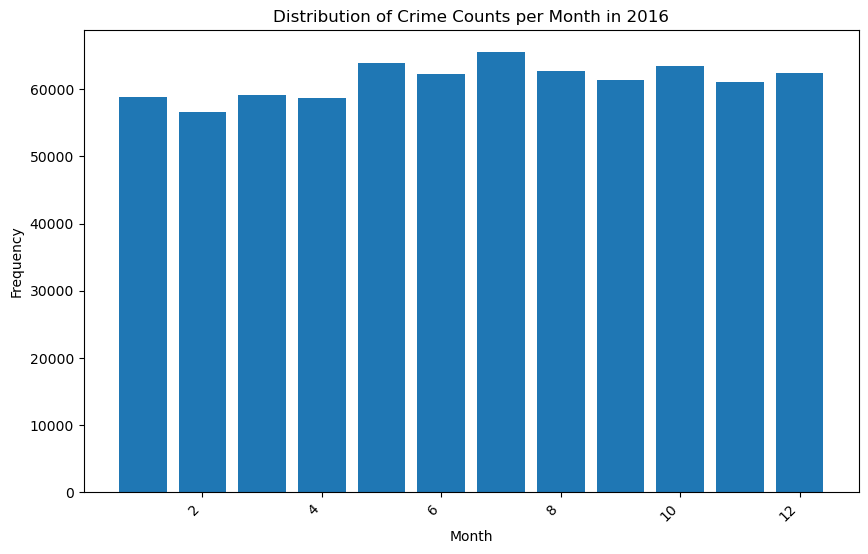

In [8]:
crime_2016 = df[df['year'] == 2016]

crime_by_month_2016 = crime_2016.groupby('month')['value'].sum()

plt.figure(figsize=(10, 6))
plt.bar(crime_by_month_2016.index, crime_by_month_2016)

plt.title('Distribution of Crime Counts per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Dari plot diatas dapat dilihat pada tahun 2016, pada bulan ke 2 memiliki tingkat kejahatan yang lebih rendah dibanding bulan lainnya. Dan pada bulan ke 7 memiliki tingkat kejahatan yang paling tinggi

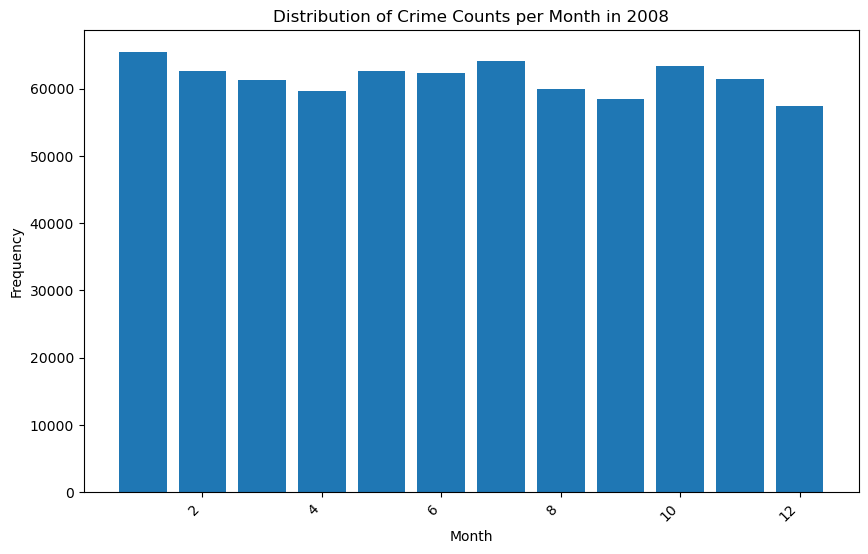

In [9]:
crime_2008 = df[df['year'] == 2008]

crime_by_month_2008 = crime_2008.groupby('month')['value'].sum()

plt.figure(figsize=(10, 6))
plt.bar(crime_by_month_2008.index, crime_by_month_2008)

plt.title('Distribution of Crime Counts per Month in 2008')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Dari plot diatas dapat dilihat pada tahun 2008, pada bulan ke 12 memiliki tingkat kejahatan yang lebih rendah dibanding bulan lainnya. Dan pada bulan ke 1 memiliki tingkat kejahatan yang paling tinggi

# Bar Chart

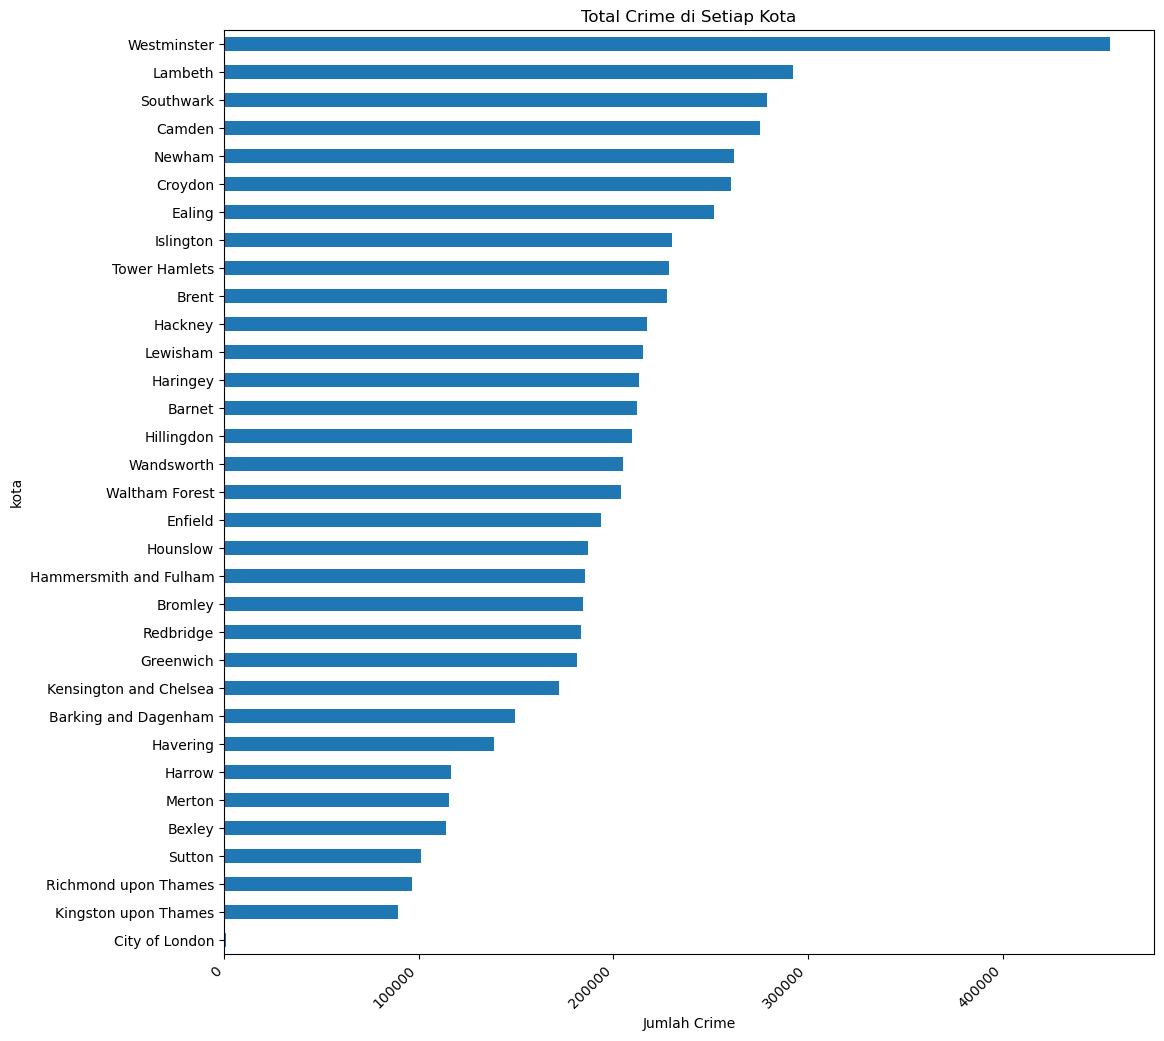

In [10]:
borough_crime_counts = df.groupby('borough')['value'].sum().sort_values(ascending=True)

plt.figure(figsize=(12,12))
borough_crime_counts.plot(kind='barh')
plt.title('Total Crime di Setiap Kota')
plt.ylabel('kota')
plt.xlabel('Jumlah Crime')
plt.xticks(rotation=45, ha='right')
plt.show()

Pada plot diatas dapat disimpulkan, kota westminster memiliki tingkat kejahatan yang paling tinggi sehingga rawan akan kejahatan. sedangkan kota london adalah kota yang paling aman karna memiliki tinggkat kejahatan yang sangat rendah


# Area Plot

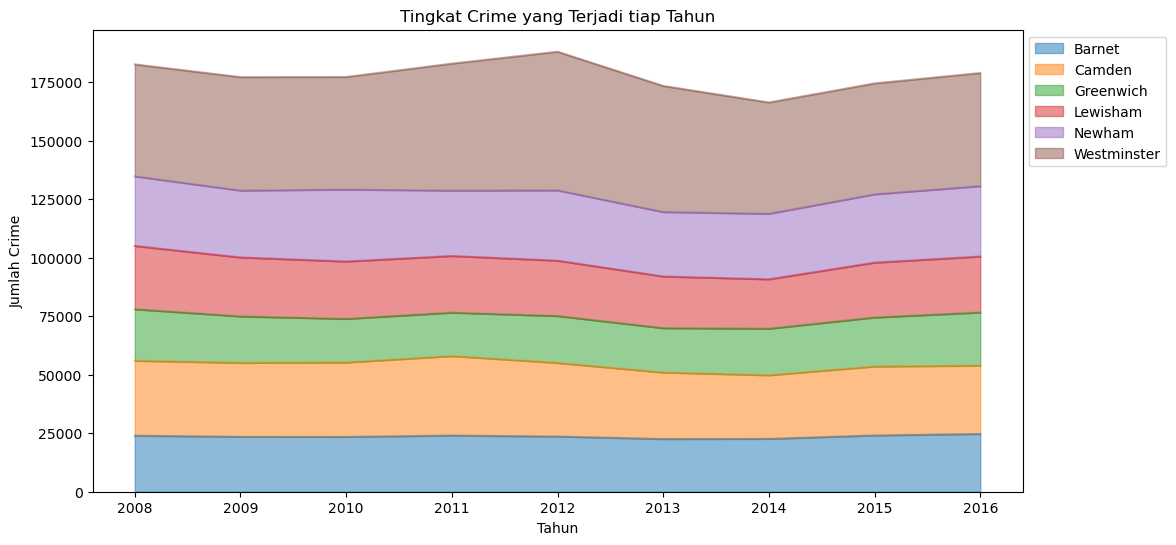

In [11]:
borough_pilih = ['Barnet', 'Camden', 'Greenwich', 'Lewisham', 'Newham', 'Westminster']

borough_pilih_crime = df[df['borough'].isin(borough_pilih)]

yearly_selected_boroughs_crime = borough_pilih_crime.groupby(['year', 'borough'])['value'].sum().unstack()

yearly_selected_boroughs_crime.plot(kind='area', stacked=True, alpha=0.5, figsize=(12,6))
plt.title('Tingkat Crime yang Terjadi tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Crime')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Dapat dilihat dari plot diatas, kota westminster memiliki tingkat kejahatan yang paling tinggi setiap tahunnya dari kota kota yang dipilih diatas

# Pie Chart

In [12]:
crime_2016 = df[df['year'] == 2016]

total_crime_by_borough_2016 = crime_2016.groupby('minor_category')['value'].sum()

print(total_crime_by_borough_2016)

minor_category
Assault with Injury                        50038
Burglary in Other Buildings                25289
Burglary in a Dwelling                     42996
Business Property                           1654
Common Assault                             64440
Counted per Victim                             0
Criminal Damage To Dwelling                13951
Criminal Damage To Motor Vehicle           25787
Criminal Damage To Other Building           6700
Drug Trafficking                            3392
Going Equipped                               604
Handling Stolen Goods                       1377
Harassment                                 78676
Motor Vehicle Interference & Tampering     11438
Murder                                       101
Offensive Weapon                            5013
Other Criminal Damage                      17633
Other Drugs                                  319
Other Fraud & Forgery                          0
Other Notifiable                           15205
Other

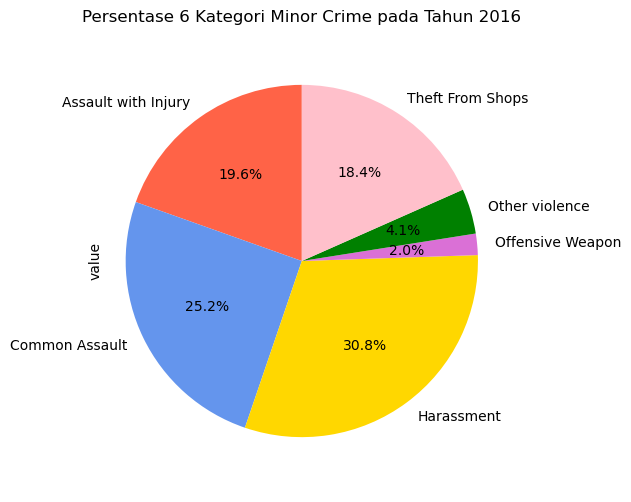

In [14]:
borough_pilih = ['Common Assault', 'Harassment', 'Theft From Shops', 'Offensive Weapon', 'Assault with Injury','Other violence']

borough_pilih_crime = df[df['minor_category'].isin(borough_pilih)]

borough_2016 = borough_pilih_crime[(borough_pilih_crime['year'] == 2016) & (borough_pilih_crime['minor_category'].isin(borough_pilih))]

borough_2016_total = borough_2016.groupby('minor_category')['value'].sum()

colors_list = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green','pink']

borough_2016_total.plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            colors = colors_list,
                            shadow=False,)
plt.title('Persentase 6 Kategori Minor Crime pada Tahun 2016')
plt.axis('equal')
plt.show()

Dari kategori kejahatan yang dipilih, kategori Harassment memiliiki persentasi yang paling tinggi daripada kategori kejahatan yang lainnya

# Word Clouds

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
stopwords = set(STOPWORDS)

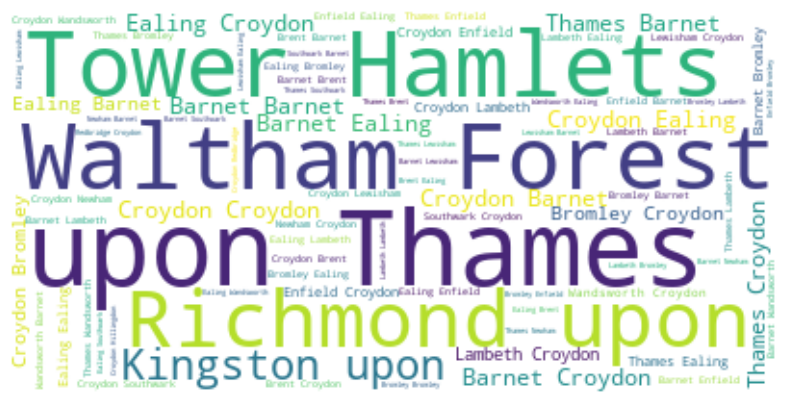

In [17]:
text_data = ' '.join(df['borough'].astype(str))

london_crime_borough = WordCloud(
    background_color='white',
    max_words=1000,
    stopwords=STOPWORDS)

london_crime_borough.generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(london_crime_borough, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()